In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tarfile
from pathlib import Path
from statistics import median
import csv
import os
import scipy.io

In [6]:
DATA = Path('/content/drive/My Drive/SML/03')

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.4.1 pandas==1.1.5 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.3 louvain==0.7.0


# 1a. UMAP

In [7]:
filename = DATA/"t_4k_filtered_gene_bc_matrices.tar.gz"
tf = tarfile.open(filename)
tf.extractall()

In [8]:
tf.getmembers()

[<TarInfo 'filtered_gene_bc_matrices' at 0x7fa8d2d9a110>,
 <TarInfo 'filtered_gene_bc_matrices/GRCh38' at 0x7fa8d2d9acc8>,
 <TarInfo 'filtered_gene_bc_matrices/GRCh38/matrix.mtx' at 0x7fa8d2d9ae58>,
 <TarInfo 'filtered_gene_bc_matrices/GRCh38/genes.tsv' at 0x7fa8d2d9ad90>,
 <TarInfo 'filtered_gene_bc_matrices/GRCh38/barcodes.tsv' at 0x7fa8d2d9af20>]

In [9]:
matrix_dir = "/content/filtered_gene_bc_matrices/GRCh38"
mat = scipy.io.mmread(os.path.join(matrix_dir, "matrix.mtx"))

genes_path = os.path.join(matrix_dir, "genes.tsv")
genes = pd.read_csv(genes_path, sep='\t', header=None, 
                    names=['ENSG', 'genes'], index_col=['genes'])

barcodes_path = os.path.join(matrix_dir, "barcodes.tsv")
barcodes = pd.read_csv(barcodes_path, sep='\t', header=None, 
                       names=['cells'], index_col=['cells'])

In [10]:
mat

<33694x4538 sparse matrix of type '<class 'numpy.int64'>'
	with 4950191 stored elements in COOrdinate format>

In [11]:
genes

,ENSG
genes,
RP11-34P13.3,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC233755.2,ENSG00000277856
AC233755.1,ENSG00000275063
AC240274.1,ENSG00000271254


In [12]:
barcodes

""
cells
AAACCTGAGTGAAGAG-1
AAACCTGCAAACCTAC-1
AAACCTGCACTGCCAG-1
AAACCTGCAGGTGCCT-1
AAACCTGCAGTAACGG-1
...
TTTGTCAGTAGAGCTG-1
TTTGTCAGTAGCGTGA-1
TTTGTCAGTCCCTTGT-1


In [13]:
dense = mat.toarray()
dense  # matrix in dense format

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
# dense.shape

In [15]:
# genes.index.nunique()

In [16]:
# library size
ls = np.sum(dense, axis=0)  
# ls.shape

Text(0, 0.5, 'Frequency')

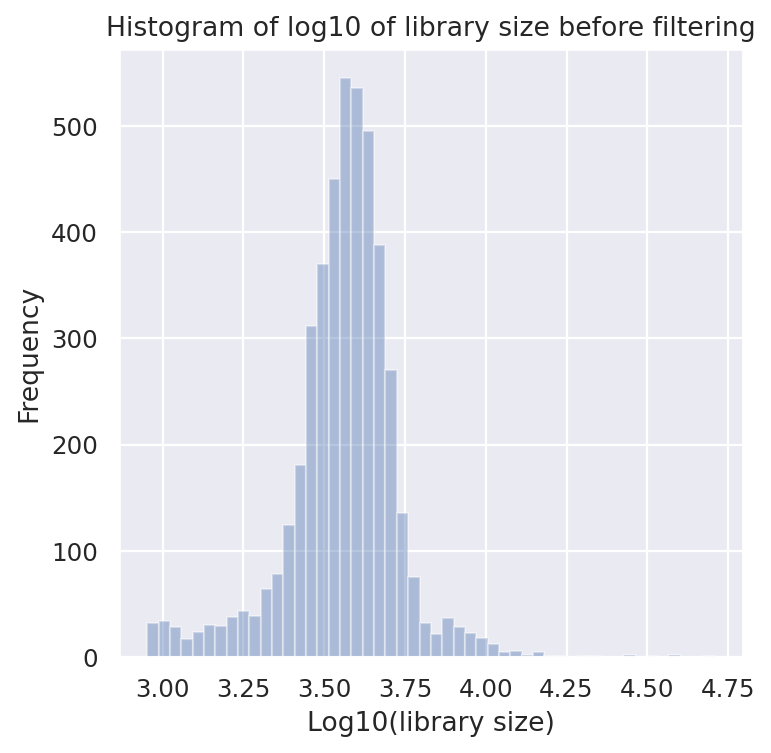

In [17]:
# check distribution of library size
sc.settings.set_figure_params(dpi=80)
sns.set(color_codes=True)

plt.figure(figsize=(5, 5))
sns.distplot(np.log10(ls), kde=False, axlabel='Log10(library size)')
plt.title('Histogram of log10 of library size before filtering')
plt.ylabel('Frequency')

Convert matrix to AnnData First. **Notice Anndata obs are cells, var is genes. So, Anndata is the transpose of the original matrix.**

In [18]:
adata = sc.AnnData(dense.transpose(), 
                   obs=barcodes, 
                   var=genes)
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [19]:
# Filter out cells according the histogram above
threshold_cells = 3.25
sc.pp.filter_cells(adata, min_counts=10**threshold_cells)

filtered out 250 cells that have less than 1778.2794100389228 counts


Text(0, 0.5, 'Frequency')

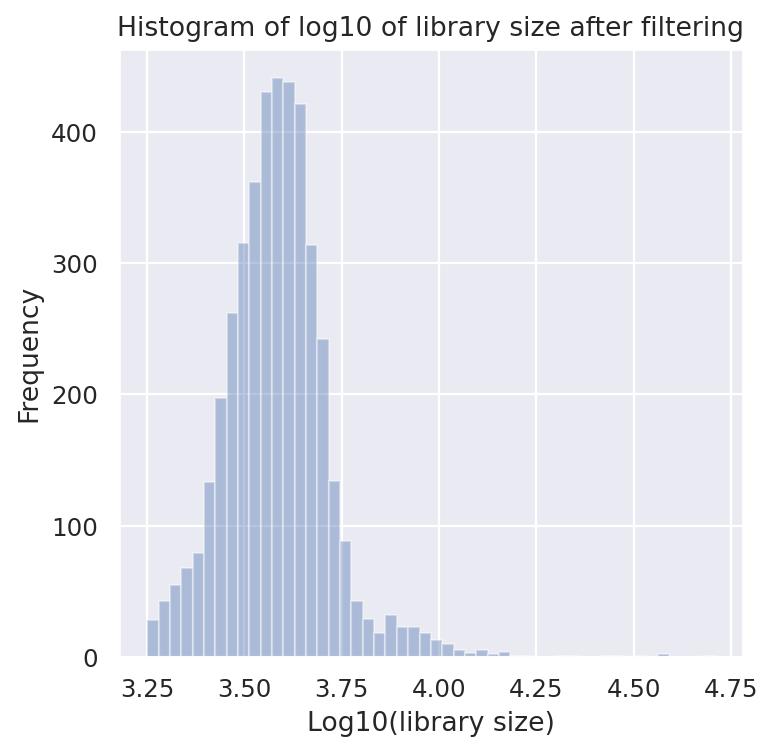

In [20]:
# Distribution of library size after filtering
plt.figure(figsize=(5, 5))
sns.distplot(np.log10(adata.obs.n_counts), kde=False, axlabel='Log10(library size)')
plt.title('Histogram of log10 of library size after filtering')
plt.ylabel('Frequency')

In [21]:
# get the dense matrix filtered by lib size
dense_filtered = dense[: , np.array(np.where(barcodes.index.isin(adata.obs.index))).flatten()]
# dense_filtered.shape

In [22]:
num_cells = np.sum(np.where(dense_filtered>0, True, False), 
                   axis=1)
# Add 1 to those genes that are expressed in 0 cells for log calculation
num_cells[num_cells==0] = 1  
num_cells.shape

(33694,)

Text(0, 0.5, 'Density')

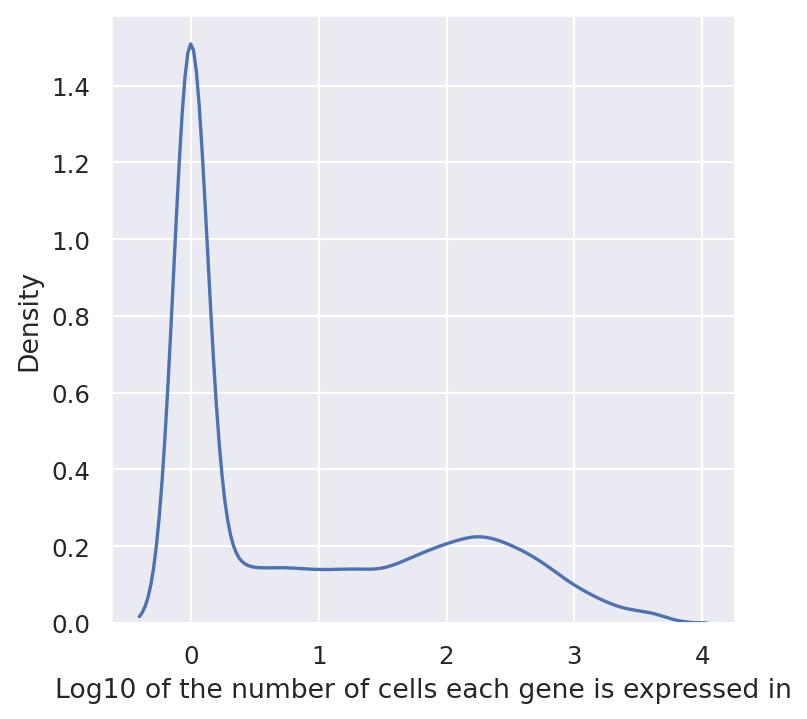

In [23]:
# check distribution of gene expression
plt.figure(figsize=(5, 5))
sns.distplot(np.log10(num_cells), hist=False, 
             axlabel='Log10 of the number of cells each gene is expressed in')
plt.ylabel('Density')

In [24]:
threshold_genes = 1.5
sc.pp.filter_genes(adata, min_cells=10**threshold_genes)

filtered out 23253 genes that are detected in less than 31.622776601683793 cells


In [25]:
# Ready for normalization. Make sure to use correct data to start with
adata1 = sc.AnnData(dense.transpose(), 
                   obs=barcodes, 
                   var=genes)

print("Number of var_names before making unique:", adata1.var_names.nunique())
adata1.var_names_make_unique()
print("Number of var_names after making unique:", adata1.var_names.nunique())

sc.pp.filter_cells(adata1, min_counts=10**threshold_cells)
sc.pp.filter_genes(adata1, min_cells=10**threshold_genes)
adata1

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of var_names before making unique: 33660
Number of var_names after making unique: 33694
filtered out 250 cells that have less than 1778.2794100389228 counts
filtered out 23253 genes that are detected in less than 31.622776601683793 cells


AnnData object with n_obs × n_vars = 4288 × 10441
    obs: 'n_counts'
    var: 'ENSG', 'n_cells'

In [26]:
# Global normalization
median_ls = median(np.array(adata1.obs.n_counts).flatten())  # 'ls' stands for library size

sc.pp.normalize_total(adata1, target_sum=median_ls)

normalizing counts per cell
    finished (0:00:00)


In [27]:
# # Double check the normalization result - each cell should have total counts = median_ls
# adata1.X.sum(axis=1)

computing PCA
    with n_comps=50
    finished (0:00:11)


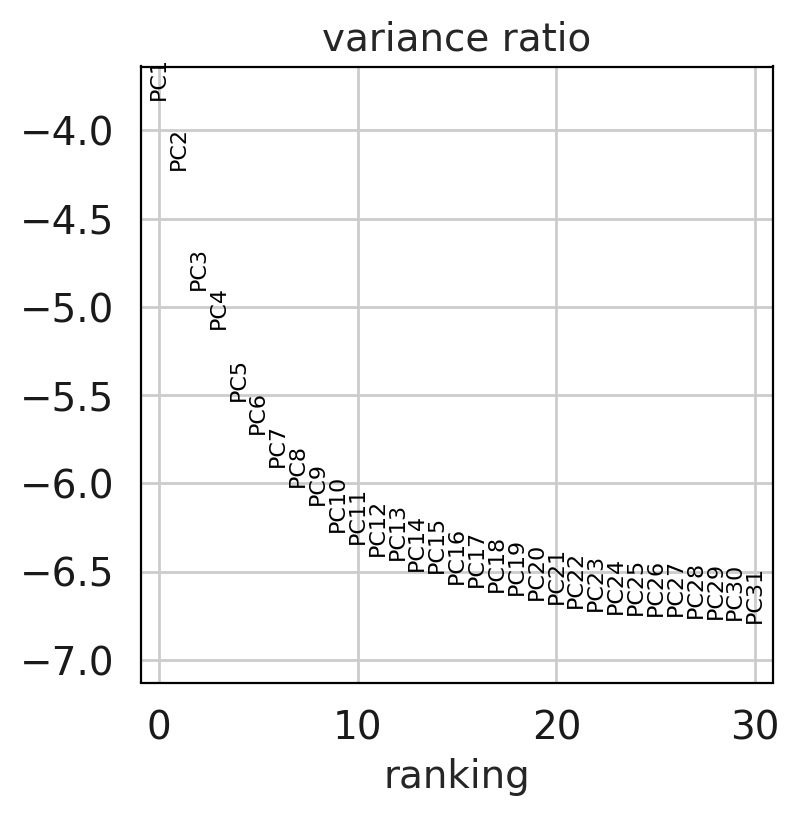

In [28]:
# dimensionality reduction

sc.settings.set_figure_params(dpi=100)

# log transformation
sc.pp.log1p(adata1)

sc.tl.pca(adata1)
# Decide the number of principle components in Umap
sc.pl.pca_variance_ratio(adata1, log=True)

In [29]:
# np.any(np.isnan(dense))

In [30]:
# np.count_nonzero(~np.isnan(dense))

In [31]:
# sum(sum(np.isnan(adata1.X)))

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


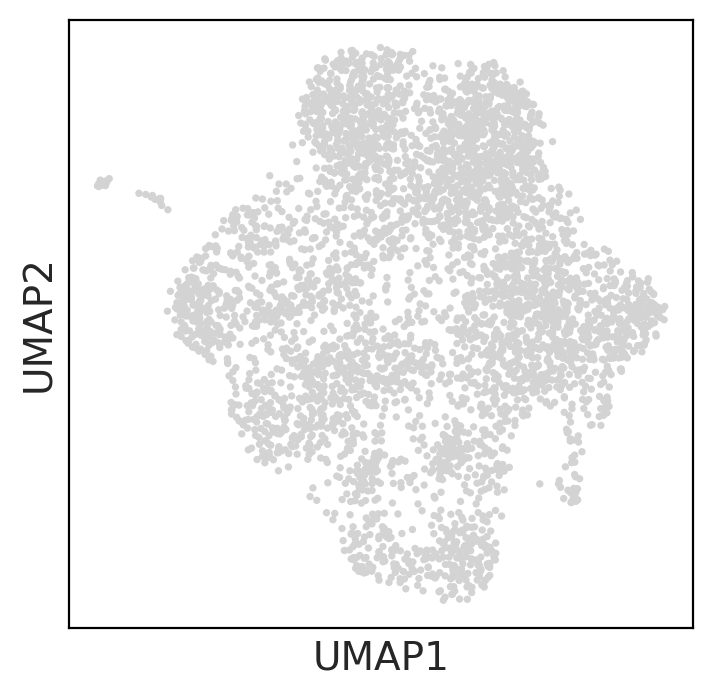

In [32]:
# Based on the figures above, choose the number of principle components
sc.pp.neighbors(adata1, n_pcs=20)
sc.tl.umap(adata1)
sc.pl.umap(adata1)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


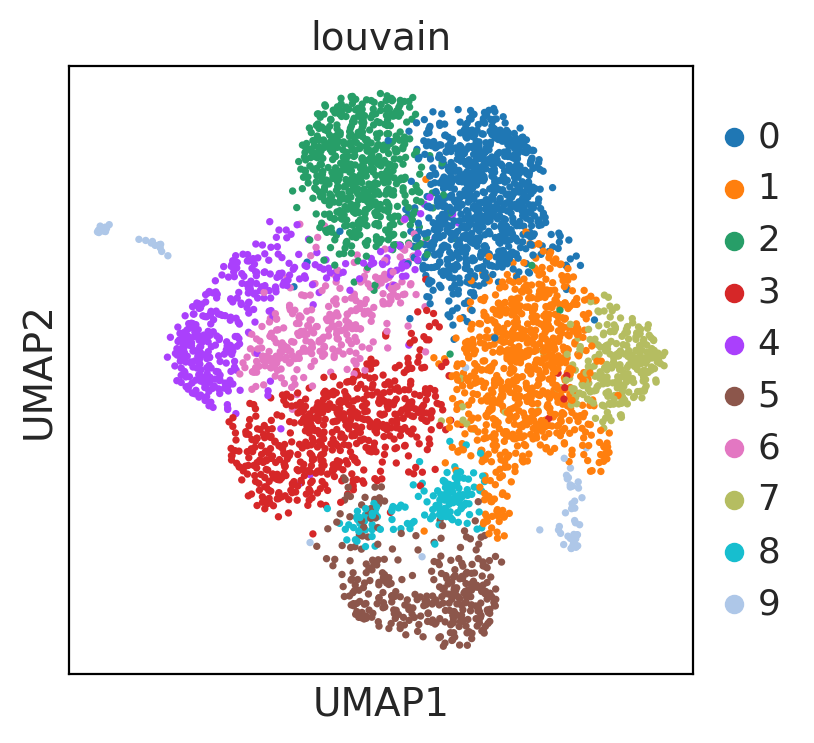

In [33]:
# Color the UMAP by Louvain
sc.tl.louvain(adata1)
sc.pl.umap(adata1, color='louvain')

# 1b. 

The embedding suggests it is NOT defined cell types. It is continuous trajectories characterizing heterogeneity across T cells. We don't see distinct clusters in the UMAP. Instead, we see heterogeneity in one grouped cells. 

# 1c. Test robustness of Louvain

## k = 15

Used the kNN above with the default value 15. 

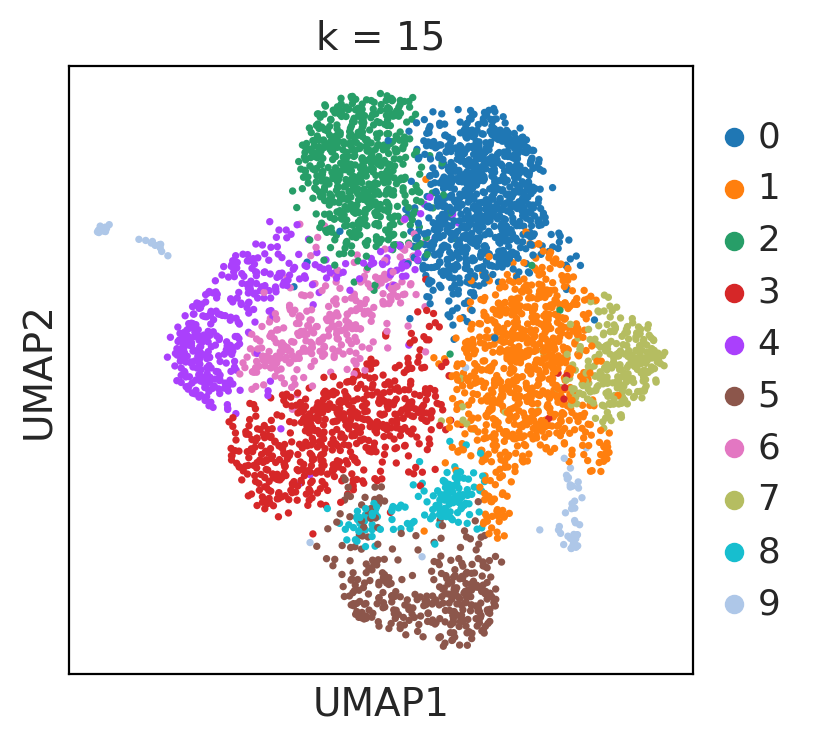

In [34]:
sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata1, color='louvain', title="k = 15")

## k = 5

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


filtered out 250 cells that have less than 1778.2794100389228 counts
filtered out 23253 genes that are detected in less than 31.622776601683793 cells
normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:14)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 14 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


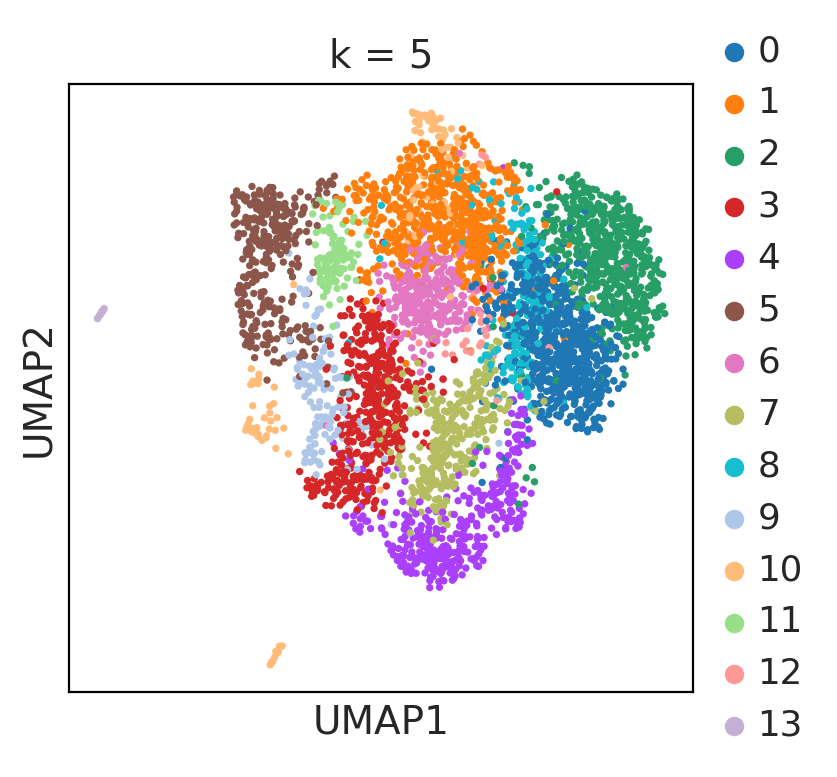

In [35]:
# reset the data
adata = sc.AnnData(dense.transpose(), 
                   obs=barcodes, 
                   var=genes)

adata.var_names_make_unique()

sc.pp.filter_cells(adata, min_counts=10**threshold_cells)
sc.pp.filter_genes(adata, min_cells=10**threshold_genes)
sc.pp.normalize_total(adata, target_sum=median_ls)

sc.pp.log1p(adata) 

sc.tl.pca(adata)

sc.pp.neighbors(adata, n_neighbors=5, n_pcs=20)
sc.tl.umap(adata)
sc.tl.louvain(adata)
sc.pl.umap(adata, color='louvain', title="k = 5")

## k = 40

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


filtered out 250 cells that have less than 1778.2794100389228 counts
filtered out 23253 genes that are detected in less than 31.622776601683793 cells
normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:14)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:17)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)


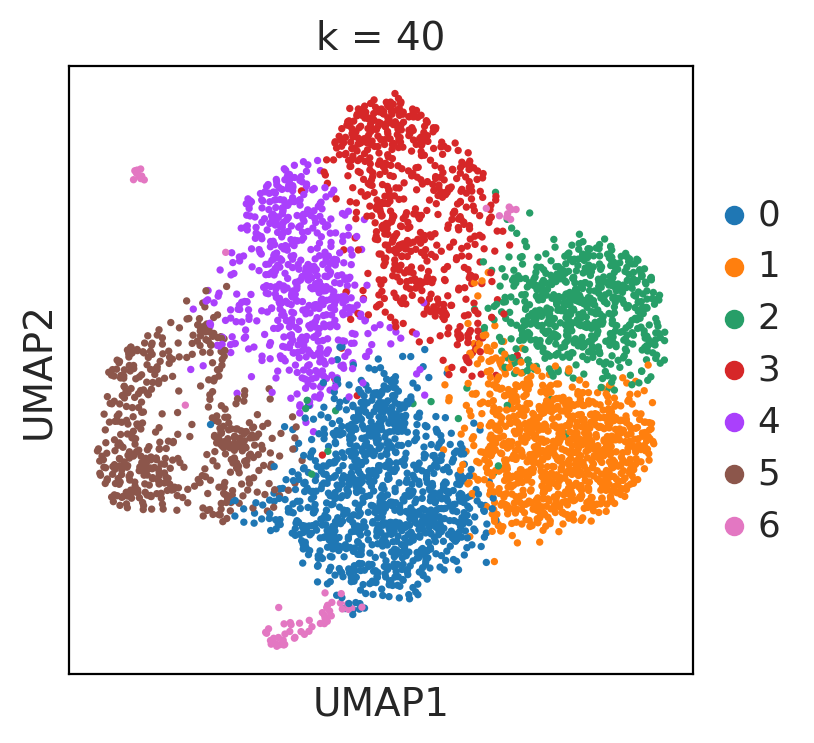

In [36]:
# reset the data
adata = sc.AnnData(dense.transpose(), 
                   obs=barcodes, 
                   var=genes)

adata.var_names_make_unique()

sc.pp.filter_cells(adata, min_counts=10**threshold_cells)
sc.pp.filter_genes(adata, min_cells=10**threshold_genes)
sc.pp.normalize_total(adata, target_sum=median_ls)

sc.pp.log1p(adata)

sc.tl.pca(adata)

sc.pp.neighbors(adata, n_neighbors=40, n_pcs=20)
sc.tl.umap(adata)
sc.tl.louvain(adata)
sc.pl.umap(adata, color='louvain', title='k = 40')

For different k in the kNN graph, the total number of clusters by Lourvain has changed. For k = 15, there are 9 clusters. For k = 5, there are 13 clusters. For k = 40, there are 6 clusters. So, Louvain is relatively sensitive to the choice of k in the kNN graph. 

# 2a. Diffusion map

In [37]:
# reset the data

adata = sc.AnnData(dense.transpose(), 
                   obs=barcodes, 
                   var=genes)

adata.var_names_make_unique()

sc.pp.filter_cells(adata, min_counts=10**threshold_cells)
sc.pp.filter_genes(adata, min_cells=10**threshold_genes)
sc.pp.normalize_total(adata, target_sum=median_ls)

sc.pp.log1p(adata)  # log transformation 

sc.pp.neighbors(adata, n_pcs=20, use_rep='X')  # required by this package
# since being asked to use log normalized data instead of output of PCA
# forced the function not to use PCA by setting use_rep='X'

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


filtered out 250 cells that have less than 1778.2794100389228 counts
filtered out 23253 genes that are detected in less than 31.622776601683793 cells
normalizing counts per cell
    finished (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)


In [38]:
sc.tl.diffmap(adata)
adata

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [ 1.0000001   0.9677212   0.9340227   0.9042738   0.88437295  0.85886604
      0.8368871   0.8319752   0.83100337  0.8056217  -0.8304815  -0.8315087
     -0.8353895  -0.8673601  -0.98381203]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


AnnData object with n_obs × n_vars = 4288 × 10441
    obs: 'n_counts'
    var: 'ENSG', 'n_cells'
    uns: 'log1p', 'neighbors', 'diffmap_evals'
    obsm: 'X_diffmap'
    obsp: 'distances', 'connectivities'

In [39]:
adata.obsm['X_diffmap'].shape

(4288, 15)

The size of each diffusion component is 4288. It equals to the sample size after I have filtered out some cells.

# 2b. Color the embedding in 1a with the first 3 diffusion components

In [40]:
# get the first 3 diffusion components
# for the embedding in 1a
diffmap = adata.obsm['X_diffmap']

adata1.obs['dc1'] = diffmap[:,0]
adata1.obs['dc2'] = diffmap[:,1]
adata1.obs['dc3'] = diffmap[:,2]
adata1.obs

,n_counts,louvain,dc1,dc2,dc3
cells,,,,,
AAACCTGAGTGAAGAG-1,3212.0,6,0.008769,0.004940,0.002328
AAACCTGCAAACCTAC-1,3460.0,4,0.012022,0.006917,0.003895
AAACCTGCACTGCCAG-1,3434.0,1,0.007758,0.004163,0.001827
AAACCTGCAGGTGCCT-1,3823.0,0,0.009469,0.005418,0.002668
AAACCTGCAGTAACGG-1,3001.0,3,0.008389,0.004724,0.002316
...,...,...,...,...,...
TTTGTCAGTAGAGCTG-1,4380.0,5,0.017407,-0.004835,-0.007769
TTTGTCAGTAGCGTGA-1,3080.0,6,0.015417,0.009689,0.005285
TTTGTCAGTCCCTTGT-1,5222.0,7,0.009905,0.004765,0.001628


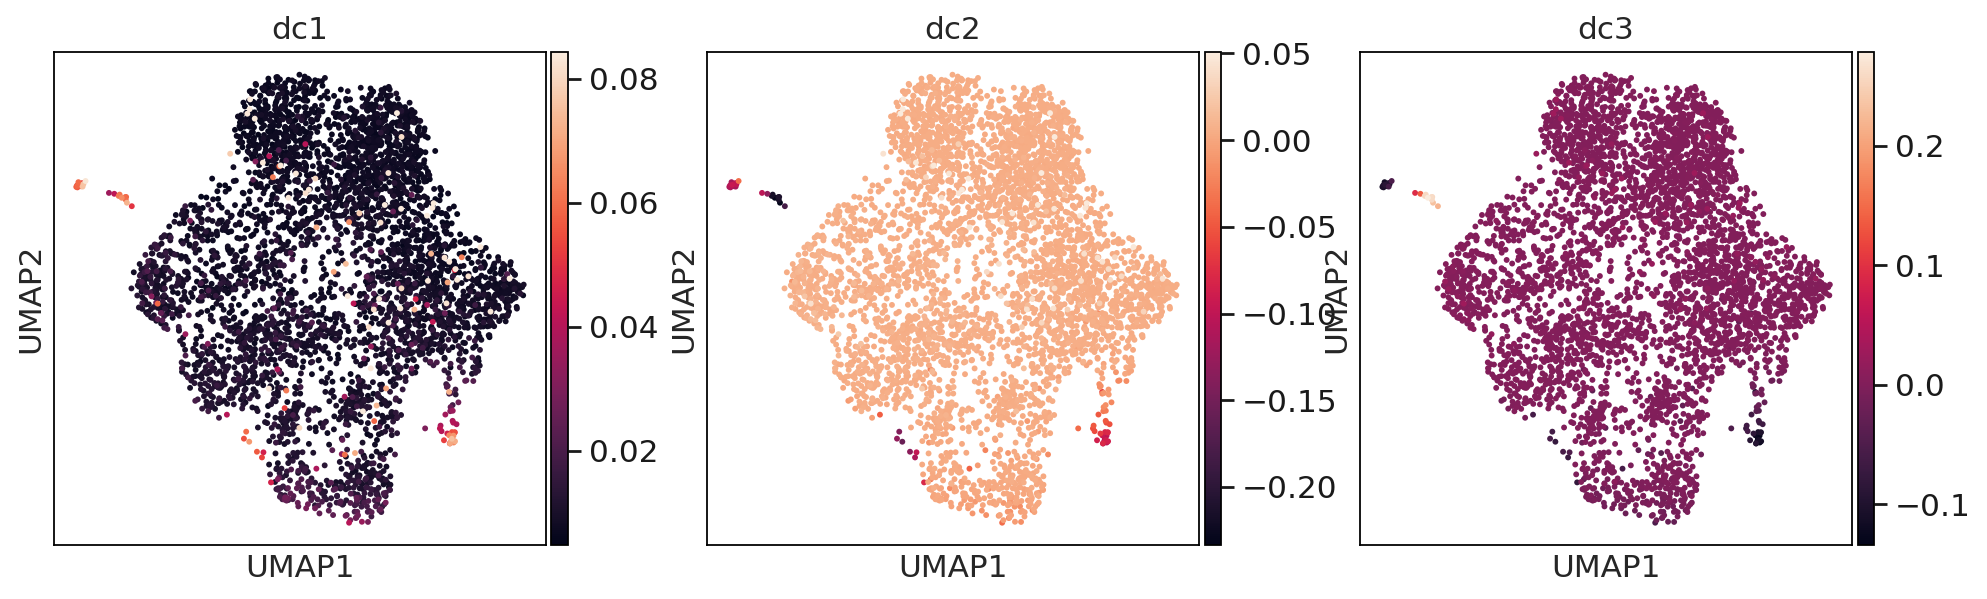

In [41]:
# color the embedding in 1a with the first diffusion components in 2a
# k = 15
sc.settings.set_figure_params(dpi=80)
sc.pl.umap(adata1, color=['dc1', 'dc2', 'dc3'])

# 2c. Project in the space of the first two diffusion components

## Without coloring

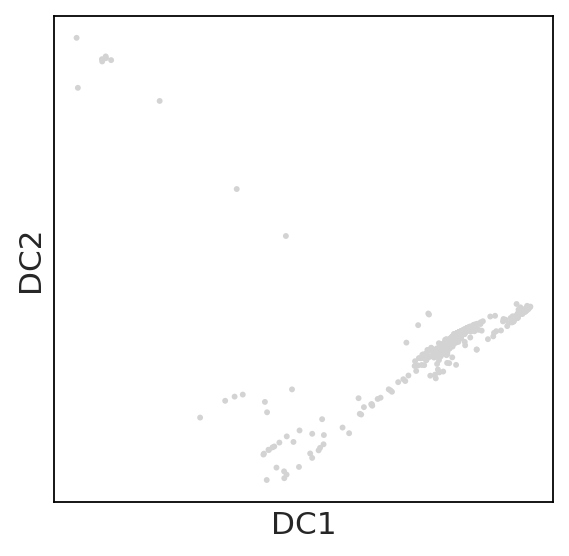

In [42]:
sc.pl.diffmap(adata, components='1,2')

## Colored by Louvain

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 4 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


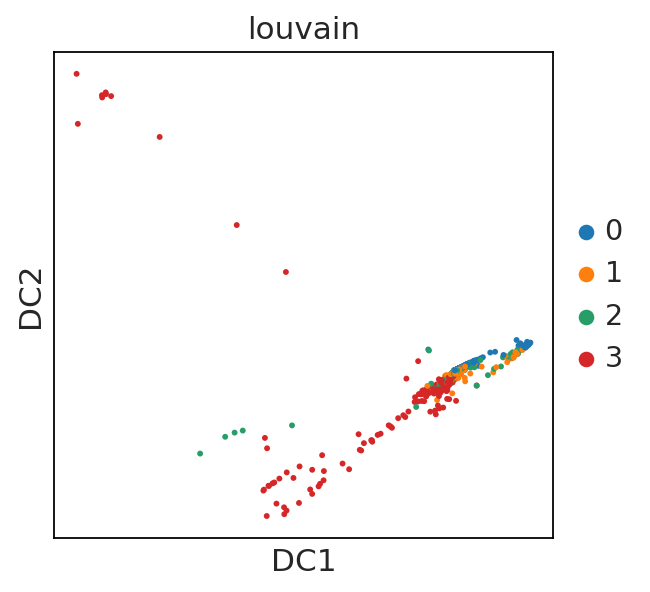

In [43]:
sc.tl.louvain(adata)
sc.pl.diffmap(adata, color='louvain')

The UMAP in 1a does NOT allow for the visualization of trajectories. It was just a big group of clusters being together. Projecting on the first diffusion components allows for the visualization of trajectories. 

# 2d. Pearson correlation between gene expression and the second diffusion component

In [44]:
# test sorting
Y = [3, 2, 1, 4]
X = ["a", "b", "c", "d"]

Z = [x for _,x in sorted(zip(Y, X))]
print(Z[0:3])
print(Z)
# ended up not using this way and used dataframe instead

['c', 'b', 'a']
['c', 'b', 'a', 'd']


In [45]:
adata.X.shape

(4288, 10441)

In [46]:
adata.var.index

Index(['FO538757.2', 'AP006222.2', 'RP11-206L10.9', 'LINC00115', 'FAM41C',
       'NOC2L', 'HES4', 'ISG15', 'C1orf159', 'TNFRSF18',
       ...
       'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB',
       'AC145212.2', 'AL592183.1', 'AC007325.4', 'AC004556.1'],
      dtype='object', name='genes', length=10441)

In [47]:
adata.obs.index

Index(['AAACCTGAGTGAAGAG-1', 'AAACCTGCAAACCTAC-1', 'AAACCTGCACTGCCAG-1',
       'AAACCTGCAGGTGCCT-1', 'AAACCTGCAGTAACGG-1', 'AAACCTGGTGCCTGCA-1',
       'AAACCTGTCGGCATCG-1', 'AAACGGGAGAAGGTGA-1', 'AAACGGGAGACAAAGG-1',
       'AAACGGGAGACACGAC-1',
       ...
       'TTTGGTTCATGACGGA-1', 'TTTGTCAAGCGTGAAC-1', 'TTTGTCACACCCAGTG-1',
       'TTTGTCACAGATGAGC-1', 'TTTGTCAGTAATCACC-1', 'TTTGTCAGTAGAGCTG-1',
       'TTTGTCAGTAGCGTGA-1', 'TTTGTCAGTCCCTTGT-1', 'TTTGTCAGTCGATTGT-1',
       'TTTGTCATCACAATGC-1'],
      dtype='object', name='cells', length=4288)

In [ ]:
# convert to a dataframe, which is easier to work with for the following steps than AnnData
# rows are genes and column are cells for the dataframes

df = pd.DataFrame(data=adata.X.transpose(), 
                    index=adata.var.index, 
                    columns=adata.obs.index)
df.index.name = None
df.columns.name = None

df

In [49]:
from scipy.stats import pearsonr

In [50]:
# Pearson correlation with the second diffusion component
# Return the correlation coefficients instead of p values
pearson_with2nd = df.apply(lambda x: pearsonr(x, diffmap[:,1])[0], axis=1)
pearson_with2nd = pd.DataFrame(pearson_with2nd, columns=['r'])
pearson_with2nd = pearson_with2nd.sort_values(by='r', ascending=False)
pearson_with2nd.head(10)

,r
RPS27,0.430206
RPS29,0.360768
RPLP2,0.338424
RPL34,0.313453
RPL32,0.281287
RPS27A,0.280940
RPL13,0.278906
RPS12,0.276569
RPL21,0.271698
RPL39,0.270685


The top 10 genes with the highest correlation with the second diffusion component are listed in the table above.

# 2e. Heatmap

A heatmap of genes by cells displaying expression of the 10 genes found in 1d with cells ordered by the second diffusion component

In [ ]:
# convert diffusion map to a dataframe
diffmap_df = pd.DataFrame(data=diffmap.transpose(), columns=adata.obs.index)
diffmap_df.columns.name = None
diffmap_df

In [ ]:
# append the diffusion component to order cells according to the second diffusion component
df2e = df.loc[pearson_with2nd.index[0:10], :].append(
    diffmap_df).sort_values(by=1, 
                            axis=1,
                            ascending=False
                            )

# df2e = df2e.append(diffmap_df)
# df2e = df2e.sort_values(by=1, axis=1, ascending=False)

# df2e = df2e.append(pd.DataFrame(data=diffmap[:, [1]].T, columns=adata.obs.index))

df2e

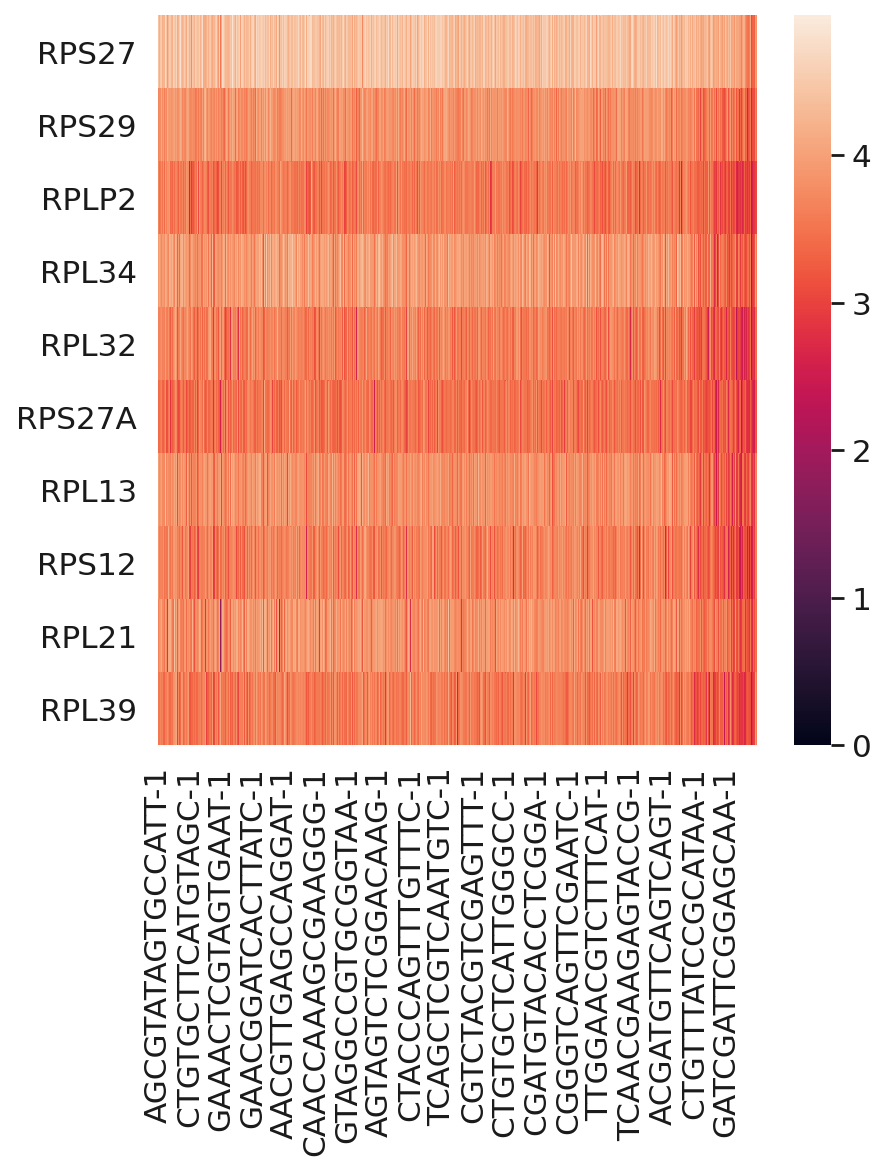

In [53]:
plt.figure(figsize=(6, 6))
sns.heatmap(df2e.iloc[0:10, :])
# cells are ordered by the second diffusion component

# 2f. Repeat the above with the 3rd diffusion component

In [54]:
pearson_with3rd = df.apply(lambda x: pearsonr(x, diffmap[:,2])[0], axis=1)
pearson_with3rd = pd.DataFrame(pearson_with3rd, columns=['r'])
pearson_with3rd = pearson_with3rd.sort_values(by='r', ascending=False)
pearson_with3rd.head(10)

,r
RPL34,0.291902
RPL39,0.274085
RPS27,0.269240
RPL32,0.268680
RPS12,0.262834
RPL13,0.254531
RPS18,0.247928
RPS6,0.247040
RPS14,0.242500
RPL31,0.237971


The top 10 genes with the highest correlation with the third diffusion component are listed in the table above.

In [ ]:
df2f = df.loc[pearson_with3rd.index[0:10], :].append(
    diffmap_df).sort_values(by=2, 
                            axis=1, 
                            ascending=False
                            )

df2f

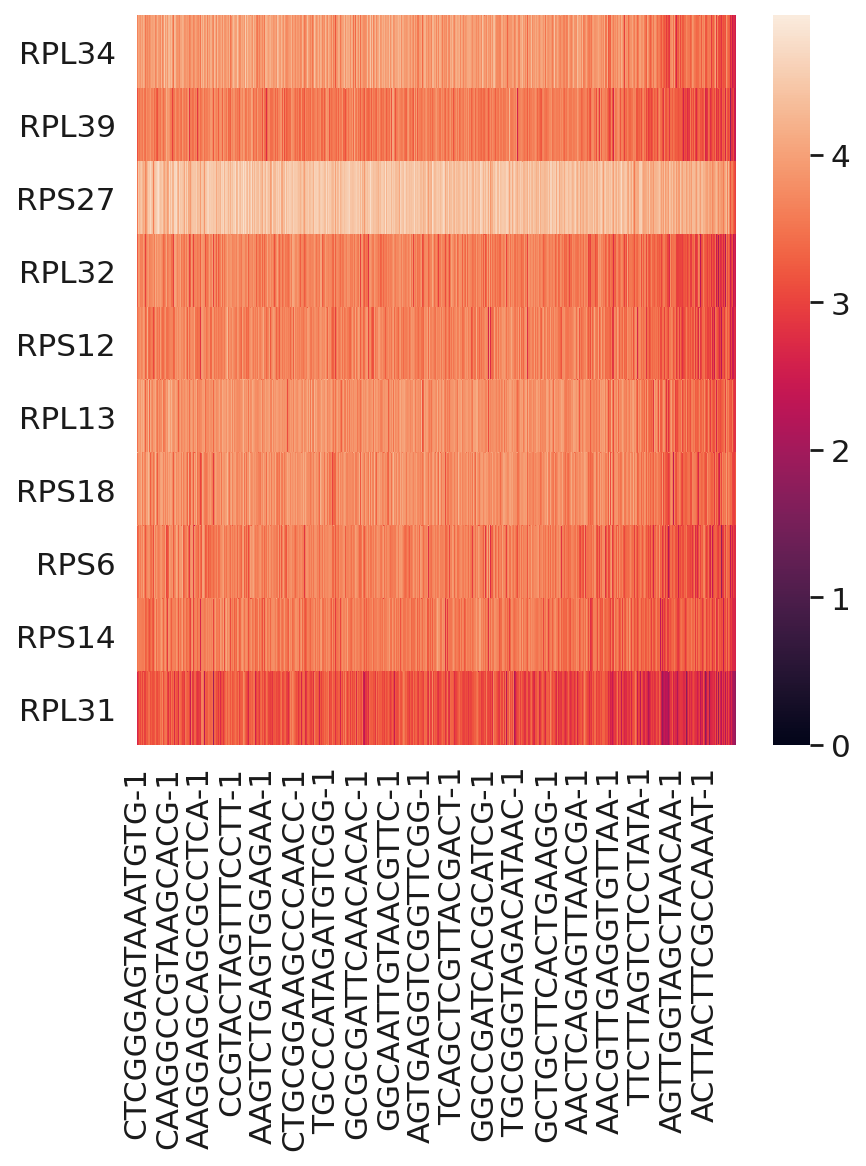

In [56]:
plt.figure(figsize=(6, 6))
sns.heatmap(df2f.iloc[0:10, :])
# cells are ordered by the third diffusion component

# 2g. Repeat the above with genes of the lowest correlation

### The 10 genes with the lowest correlation with the second diffusion component

In [57]:
pearson_with2nd.tail(10)

,r
HLA-DPB1,-0.320819
HLA-DQB1,-0.325361
HLA-DPA1,-0.328338
HLA-DQA2,-0.334544
LYZ,-0.348514
HLA-DQA1,-0.361983
CST3,-0.370624
HLA-DRB5,-0.377667
HLA-DRB1,-0.406653
HLA-DRA,-0.499968


In [58]:
df2g_with2nd = pearson_with2nd.tail(10).append(
    diffmap_df).sort_values(by=1, 
                            axis=1, 
                            ascending=False
                            ).fillna(0)

### A heatmap of genes by cells displaying expression of the 10 genes whose expression is of the lowest correlation with the second diffusion component with cells ordered by the second diffusion component

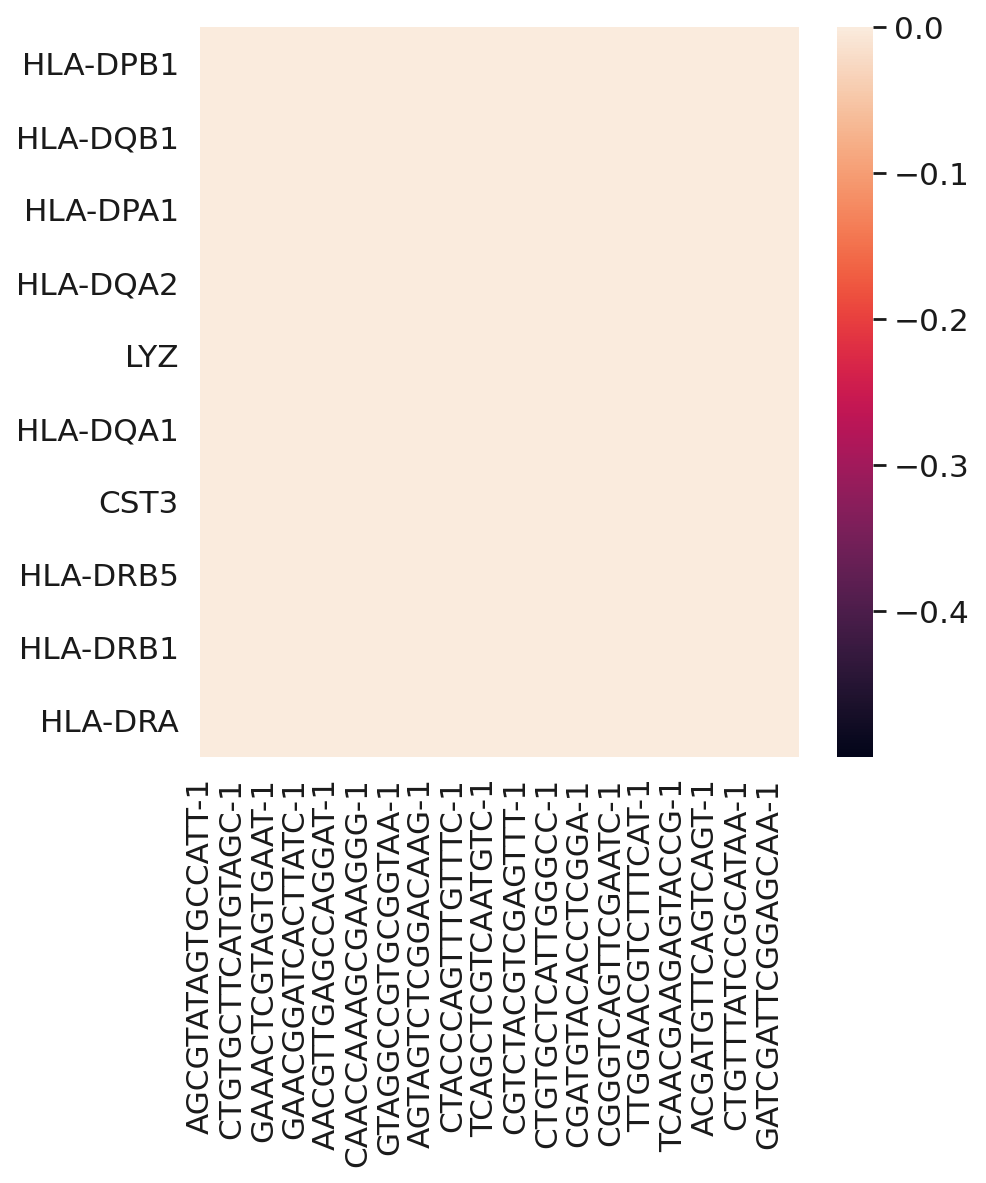

In [59]:
plt.figure(figsize=(6, 6))
sns.heatmap(df2g_with2nd.iloc[0:10, :])
# cells are ordered by the second diffusion component (high to low)

### The 10 genes with the lowest correlation with the third diffusion component

In [60]:
pearson_with3rd.tail(10)

,r
HLA-DPA1,-0.246848
HLA-DQB2,-0.249134
HLA-DQB1,-0.253581
HLA-DRA,-0.275538
HLA-DQA2,-0.287356
HLA-DRB1,-0.289217
LYZ,-0.295229
HLA-DQA1,-0.296590
HLA-DRB5,-0.315252
TMSB4X,-0.317549


In [61]:
df2g_with3rd = pearson_with3rd.tail(10).append(
    diffmap_df).sort_values(by=2, 
                            axis=1, 
                            ascending=False
                            ).fillna(0)

### A heatmap of genes by cells displaying expression of the 10 genes whose expression is of the lowest correlation with the third diffusion component with cells ordered by the second diffusion component

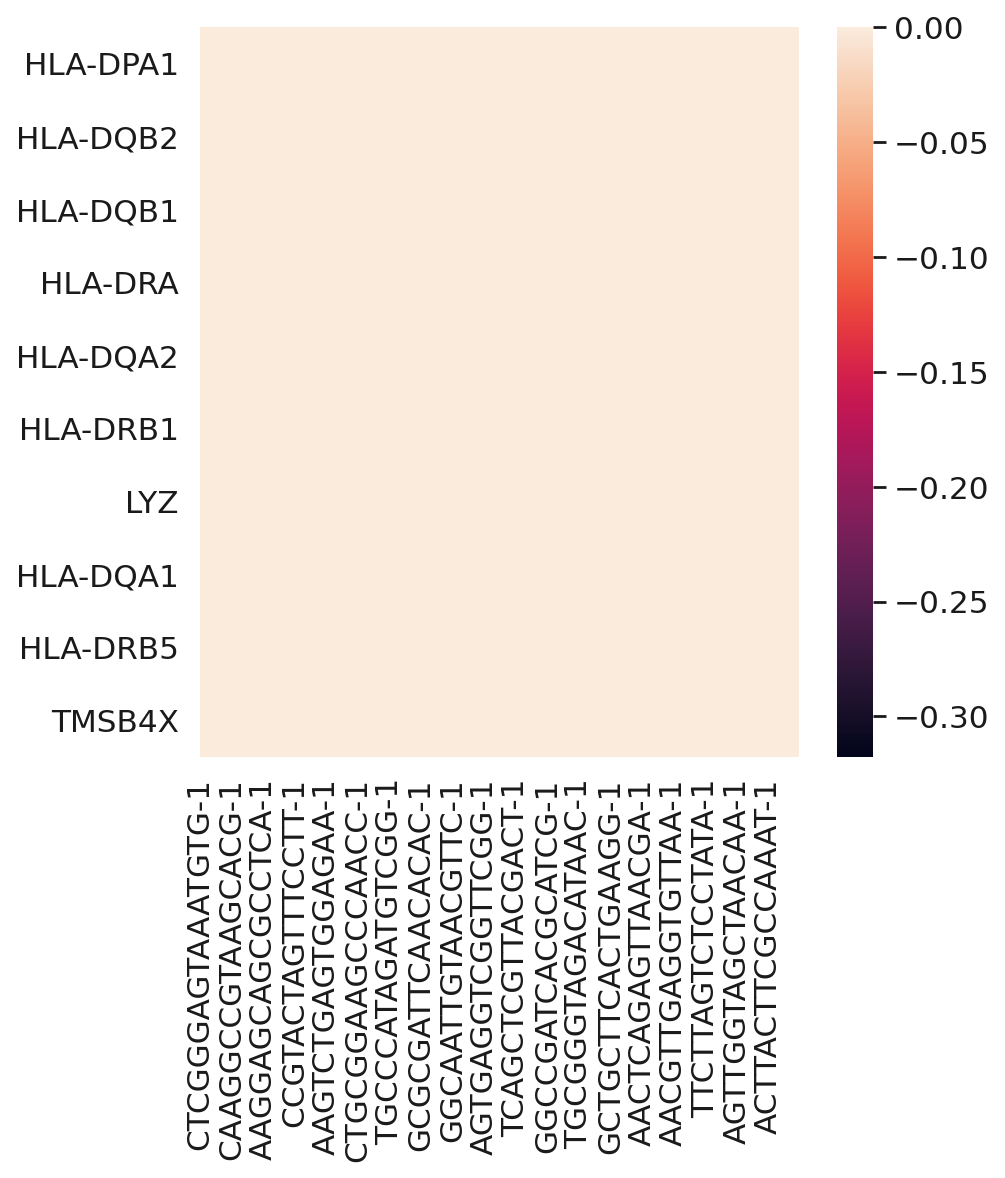

In [62]:
plt.figure(figsize=(6, 6))
sns.heatmap(df2g_with3rd.iloc[0:10, :])
# cells are ordered by the third diffusion component (high to low)

### Characterization of the second and the third diffusion components

In [63]:
print("Gene highly correlated to the second diffusion component")
print(np.array(pearson_with2nd.head(10).index))

print("Gene poorly correlated to the second diffusion component")
print(np.array(pearson_with2nd.tail(10).index))

print("Gene highly correlated to the third diffusion component")
print(np.array(pearson_with3rd.head(10).index))

print("Gene poorly correlated to the second diffusion component")
print(np.array(pearson_with3rd.tail(10).index))

Gene highly correlated to the second diffusion component
['RPS27' 'RPS29' 'RPLP2' 'RPL34' 'RPL32' 'RPS27A' 'RPL13' 'RPS12' 'RPL21'
 'RPL39']
Gene poorly correlated to the second diffusion component
['HLA-DPB1' 'HLA-DQB1' 'HLA-DPA1' 'HLA-DQA2' 'LYZ' 'HLA-DQA1' 'CST3'
 'HLA-DRB5' 'HLA-DRB1' 'HLA-DRA']
Gene highly correlated to the third diffusion component
['RPL34' 'RPL39' 'RPS27' 'RPL32' 'RPS12' 'RPL13' 'RPS18' 'RPS6' 'RPS14'
 'RPL31']
Gene poorly correlated to the second diffusion component
['HLA-DPA1' 'HLA-DQB2' 'HLA-DQB1' 'HLA-DRA' 'HLA-DQA2' 'HLA-DRB1' 'LYZ'
 'HLA-DQA1' 'HLA-DRB5' 'TMSB4X']


The top genes whose expression is correlated to the second and third diffusion components are RPs. The proteins produced from these genes are involved in assembly of either the small (regarding RPS genes) or the large ribosomal subunits (regarding RPL genes). These proteins are involved in the expansion phase of CD8+ T cells, so the second and third diffusion components are characterized as the expansion phase of CD8+ T cells. 

(The expression of HLA genes are least correlated with these two diffusion components. Since the expression of HLA genes is associated to antigen-presenting phase, these two diffusion components are NOT associated with the antigen-presentation phase.)